# FID Metric Evaluation

In [3]:
# Pyt
import torch
from torchvision.models import inception_v3
from torchvision.transforms import functional as TF
from scipy.linalg import sqrtm

import os
import numpy as np
import cv2
# Load all numpy files in a directory

# directory = '../../00_data/Samples'
# numpy_list = []

# for file_name in os.listdir(directory):
#     if file_name.endswith('.npy'):
#         file_path = os.path.join(directory, file_name)
#         image_np = np.load(file_path)

#         numpy_list.append(image_np)


In [2]:
import gc
gc.collect()

477

In [4]:

def load_images_from_subfolders(parent_folder):
    all_images = []
    for subfolder in sorted(os.listdir(parent_folder)):
        subfolder_path = os.path.join(parent_folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (299, 299))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    all_images.append(img)
    return np.array(all_images)

def get_inception_features(model, images_tensor):
    model.eval()
    features = []
    device = next(model.parameters()).device  # Get the device of the model's parameters
    with torch.no_grad():
        for img in images_tensor:
            # Assuming images_tensor is a batch of images with shape (N, C, H, W)
            # and already normalized
            if img.dim() == 3:  # If single image with C, H, W
                img = img.unsqueeze(0)  # Add batch dimension
                
                img = img.to(device, dtype=torch.float32) # Ensure the image tensor is on the same device as the model
            
            output = model(img)
            features.append(output.cpu().numpy())  # Assuming you want to work with NumPy arrays afterward
    
    features = np.concatenate(features, axis=0)
    return features


def calculate_fid(mu1, sigma1, mu2, sigma2):
    ssdiff = np.sum((mu1 - mu2) ** 2.0)
    covmean = sqrtm(sigma1.dot(sigma2), disp=False)[0]
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

# Path to your generated images and sample
folder_path = './Results_individual'

# Load generated images and sample images
# sample_images = numpy_list
# del(numpy_list)

gc.collect()



0

In [7]:

generated_images = np.load('generated_images.npy')

# Ensure sample images are resized to 299x299 as well



In [3]:
generated_images

array([[[[ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],

        [[ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],

        [[ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],

        ...,

        [[ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6],
         ...,
         [10, 10, 10],
         [10, 10, 10],
         [10, 10, 10]],

        [[ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6],
         ...,
         [10, 10, 10],
         [10, 10, 10],
         [10, 10, 10]],

        [[ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6],
         ...,
         [10, 10, 10],
         [10, 10, 10],
         [10, 10, 10]]],


       [[[14, 14, 14],
         [14, 14, 14],
         [14, 

In [4]:
# np.save("generated_images.npy", generated_images)

In [5]:
generated_images[0].shape

(299, 299, 3)

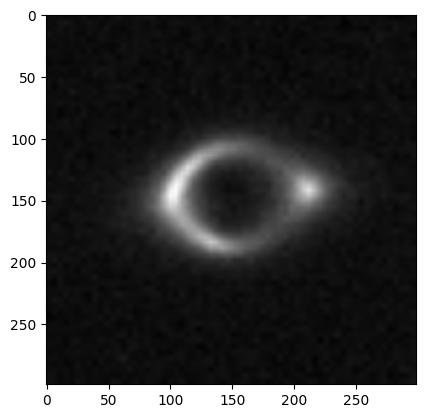

(1000, 299, 299, 3)

In [8]:
#imshow this image
import matplotlib.pyplot as plt
plt.imshow(generated_images[999])
plt.show()


generated_images.shape


In [8]:
generated_images

array([[[[ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],

        [[ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],

        [[ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],

        ...,

        [[ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6],
         ...,
         [10, 10, 10],
         [10, 10, 10],
         [10, 10, 10]],

        [[ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6],
         ...,
         [10, 10, 10],
         [10, 10, 10],
         [10, 10, 10]],

        [[ 6,  6,  6],
         [ 6,  6,  6],
         [ 6,  6,  6],
         ...,
         [10, 10, 10],
         [10, 10, 10],
         [10, 10, 10]]],


       [[[14, 14, 14],
         [14, 14, 14],
         [14, 

In [9]:
gc.collect()

2936

In [10]:
import numpy as np
from skimage.transform import resize


def resize_array(images):
    
    resized_images = np.array([resize(image, (1, 299, 299), anti_aliasing=True) for image in images])
    
    return resized_images


In [11]:

sample_images = np.array(sample_images)


In [12]:
sample_images.shape

(10000, 1, 150, 150)

In [17]:
gc.collect()

0

In [14]:
resize_sample_images = resize_array(sample_images)

In [15]:
resize_sample_images.shape

(10000, 1, 299, 299)

In [16]:
final_sample = np.repeat(resize_sample_images, 3, axis=1)



In [18]:
final_sample  = final_sample.transpose(0, 2, 3, 1)

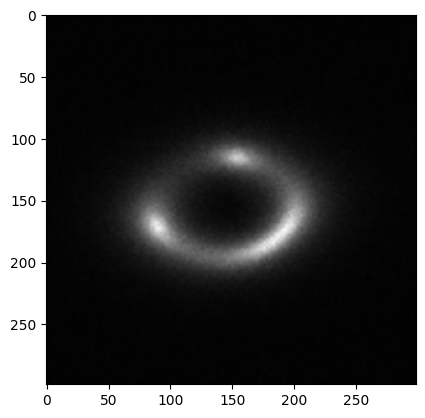

In [19]:
final_sample[0].shape
# #imshow this image
import matplotlib.pyplot as plt
plt.imshow(final_sample[0])
plt.show()


In [21]:
final_sample.shape


(10000, 299, 299, 3)

In [22]:
np.save("final_sample.npy", final_sample)

In [10]:
final_sample = np.load("final_sample.npy")

In [16]:
# sample_images = sample_images.reshape((-1, 150, 150))

# # Initialize an empty array for the resized images with the correct shape
# sample_images_resized = np.empty((sample_images.shape[0], 299, 299, 3), dtype=np.uint8)

# # Resize and repeat channels
# for i, img in enumerate(sample_images):
#     # Resize image to 299x299. Since the input is grayscale, we only need to specify the width and height.
#     resized_img = cv2.resize(img, (299, 299))
#     # Repeat the grayscale image across 3 channels to simulate an RGB image
#     resized_img_rgb = np.repeat(resized_img[:, :, np.newaxis], 3, axis=2)
#     sample_images_resized[i] = resized_img_rgb

In [11]:
# Convert arrays to PyTorch tensors and preprocess
generated_images = torch.stack([TF.to_tensor(img) for img in generated_images])
final_sample = torch.stack([TF.to_tensor(img) for img in final_sample])



In [13]:
# Initialize Inception model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = inception_v3(pretrained=True).to(device)

# Get features
gen_features = get_inception_features(model, generated_images.to(device, dtype=torch.float32))
sample_features = get_inception_features(model, final_sample.to(device, dtype=torch.float32))

# Calculate the mean and covariance of the features
mu_gen = np.mean(gen_features, axis=0)
sigma_gen = np.cov(gen_features, rowvar=False)
mu_sample = np.mean(sample_features, axis=0)
sigma_sample = np.cov(sample_features, rowvar=False)

# Calculate FID
fid_score = calculate_fid(mu_gen, sigma_gen, mu_sample, sigma_sample)
print('FID score:', fid_score)

FID score: 229.57765373385138
